### Prediction model

Devo creare un modello di previsione di prezzo di assicurazione basandomi su tre parametri principali: eta, bmi, fumo, e se pratica sport o no. 
La prima cosa è che visto che non ho dati passati, devo creare una funzione che descrive la verà relazione tra questi parametri e il prezzo dell'assicurazione. Questa funzione la puoi creare tu, dev essere non lineare, e ci deve essere un minimo di random icità per simulare la variabilità reale dei dati. 
Una volta che questa funzione è creata, devo generar eun dataset con 1000 campioni, dove per ogni campione genero casualmente i valori di eta, bmi, fumo e sport, e calcolo il prezzo dell'assicurazione usando la funzione che hai creato. Dammi il codice python per fare questo.

In [ ]:
import numpy as np
import pandas as pd

# Impostiamo un seed per rendere i risultati riproducibili
np.random.seed(42)

# Funzione che simula il prezzo assicurativo
def prezzo_assicurazione(eta, bmi, fumo, sport):
    """
    Calcola il prezzo dell'assicurazione in base a:
    - eta: età in anni (18–80)
    - bmi: indice di massa corporea (15–40)
    - fumo: 0 = non fumatore, 1 = fumatore
    - sport: 0 = non praticante, 1 = praticante
    
    La funzione è non lineare e include rumore casuale.
    """
    # Base cost: cresce con età e BMI in modo non lineare
    base = 200 + 3.5 * (eta ** 1.1) + 15 * np.log(bmi + 1)
    
    # Impatto del fumo (moltiplicativo)
    fattore_fumo = np.where(fumo == 1, 1.8 + 0.3 * np.random.rand(len(fumo)), 1.0)
    
    # Sconto per chi fa sport (riduzione non lineare)
    fattore_sport = np.where(sport == 1, 0.8 - 0.1 * np.random.rand(len(sport)), 1.0)
    
    # Rumore casuale per simulare variabilità reale
    rumore = np.random.normal(0, 100, size=len(eta))
    
    prezzo = base * fattore_fumo * fattore_sport + rumore
    
    # Assicuriamoci che il prezzo non sia negativo
    prezzo = np.maximum(prezzo, 100)
    
    return prezzo

# Generiamo 1000 campioni casuali
n = 1000
eta = np.random.randint(18, 80, n)
bmi = np.random.uniform(15, 40, n)
fumo = np.random.choice([0, 1], size=n, p=[0.7, 0.3])  # 30% fumatori
sport = np.random.choice([0, 1], size=n, p=[0.5, 0.5])  # 50% sportivi

# Calcoliamo il prezzo
prezzo = prezzo_assicurazione(eta, bmi, fumo, sport)

# Creiamo un DataFrame
df = pd.DataFrame({
    "BMI": bmi,
    "AGE": eta,
    "SMOKER": fumo,
    "PRACTICE_SPORT": sport,
    "PRICE": prezzo
})

# Mostriamo le prime righe
print(df.head())

# Se vuoi salvarlo su file:
# df.to_csv("dataset_assicurazione.csv", index=False)


   eta        bmi  fumo  sport      prezzo
0   56  24.418474     0      1  406.495147
1   69  33.739457     0      1  433.243003
2   46  24.824736     0      1  281.362091
3   32  35.729106     0      1  405.036135
4   60  29.227037     0      1  357.128304


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =========================
# 1️⃣ Se hai già il dataset
# =========================
# (Se hai usato il codice precedente, df è già definito.
# Altrimenti puoi caricarlo da file:)
# df = pd.read_csv("dataset_assicurazione.csv")

# =========================
# 2️⃣ Definiamo variabili input e target
# =========================
X = df[["BMI", "AGE", "SMOKER", "PRACTICE_SPORT"]]
y = df["price"]

# =========================
# 3️⃣ Suddivisione train/test
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 4️⃣ Creazione e training del modello
# =========================
rf = RandomForestRegressor(
    n_estimators=200,       # numero di alberi
    max_depth=None,         # profondità massima (None = libera)
    random_state=42,
    n_jobs=-1               # usa tutti i core
)

rf.fit(X_train, y_train)

# =========================
# 5️⃣ Valutazione del modello
# =========================
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# =========================
# 6️⃣ (Opzionale) Importanza delle feature
# =========================
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("\nImportanza delle variabili:")
print(importances.sort_values(ascending=False))


Mean Absolute Error: 85.12
Root Mean Squared Error: 111.39
R² Score: 0.840

Importanza delle variabili:
fumo     0.520174
eta      0.269721
sport    0.112706
bmi      0.097399
dtype: float64


In [80]:
# save model to joblib
import joblib
joblib.dump(rf, "../../assets/insurance_model.joblib")
base_price = y_train.mean()

joblib.dump(base_price, "../../assets/base_price.joblib")

['../../assets/base_price.joblib']

In [4]:
!pip install seaborn

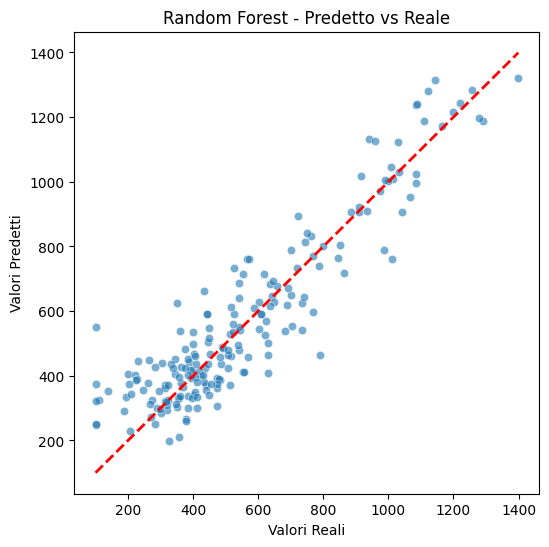

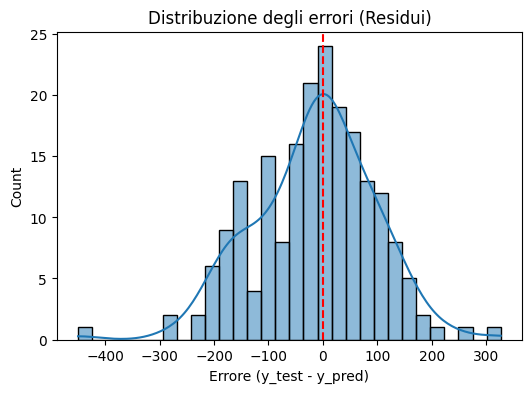

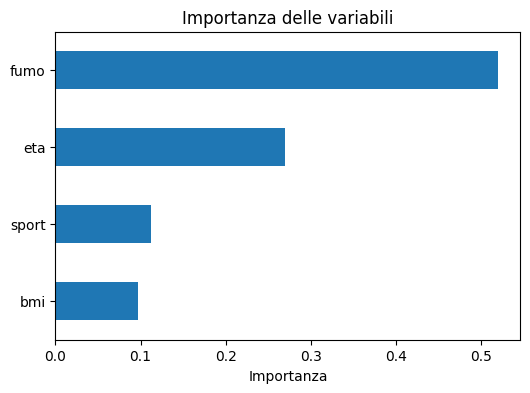

MAE = 85.12
RMSE = 111.39
R² = 0.840


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === Valori predetti ===
y_pred = rf.predict(X_test)

# === 1️⃣ Predetto vs Reale ===
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Random Forest - Predetto vs Reale")
plt.show()

# === 2️⃣ Distribuzione residui ===
residui = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residui, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribuzione degli errori (Residui)")
plt.xlabel("Errore (y_test - y_pred)")
plt.show()

# === 3️⃣ Importanza delle variabili ===
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(6,4))
importances.plot(kind='barh')
plt.title("Importanza delle variabili")
plt.xlabel("Importanza")
plt.show()

# === 4️⃣ Metriche di performance ===
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R² = {r2:.3f}")


se la mia predizione è sotto, va bene perche si fa margine, se è sopra, devo calcolare quanto devo alzare il prezzo basandomi sui miei dati (predico con il modello, e calcolo real_price vs predicted_price, e in base a questo calcolo un fattore di aggiustamento del prezzo. => predicted_price - real_price)/real_price

Prezzo base medio: 551.79 €
count    200.000000
mean       2.856817
std       48.737380
min      -64.147467
25%      -31.990470
50%      -15.601049
75%       24.924319
max      139.627852
Name: adjustment_percent, dtype: float64


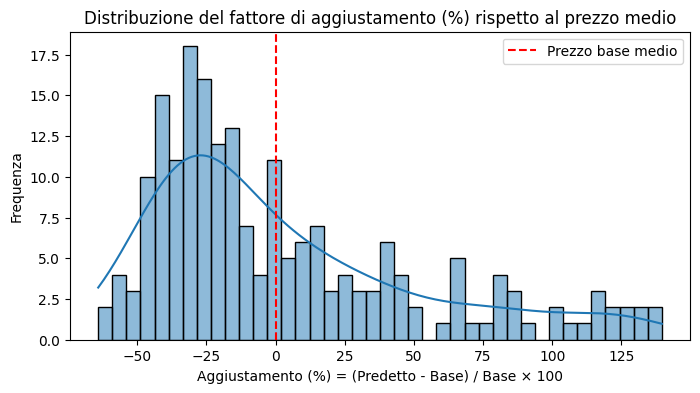

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# === Prezzo medio base (baseline) ===
base_price = y_test.mean()
print(f"Prezzo base medio: {base_price:.2f} €")

# === Calcolo del fattore di aggiustamento percentuale ===
predicted_price = y_pred
adjustment = ((predicted_price - base_price) / base_price) * 100

# === Creiamo un DataFrame per analisi ===
adjustment_df = pd.DataFrame({
    "predicted_price": predicted_price,
    "adjustment_percent": adjustment
})

# === Statistiche generali ===
print(adjustment_df["adjustment_percent"].describe())

# === Visualizziamo la distribuzione ===
plt.figure(figsize=(8,4))
sns.histplot(adjustment, bins=40, kde=True)
plt.axvline(0, color='red', linestyle='--', label='Prezzo base medio')
plt.title("Distribuzione del fattore di aggiustamento (%) rispetto al prezzo medio")
plt.xlabel("Aggiustamento (%) = (Predetto - Base) / Base × 100")
plt.ylabel("Frequenza")
plt.legend()
plt.show()

In [60]:
X_test.iloc[[0]]

,eta,bmi,fumo,sport
521,42,28.460037,0,0


In [73]:
# === Valori predetti ===
y_pred_1 = rf.predict(X_test.iloc[[10]])
y_pred_1

array([788.14498236])

In [ ]:
base_price = y_train.mean()

In [78]:
# === Calcolo del fattore di aggiustamento percentuale ===
difference = y_pred_1 - base_price
if difference > 0:
    adjustment = ((y_pred_1 - base_price) / base_price) * 100
else:
    adjustment = 0

# format dorrectly the percentage to 2 points
print(f"The adjustment in percentage is: {adjustment[0]:.2f}%")

The adjustment in percentage is: 39.66%


In [83]:
import requests

# URL dell'endpoint
url = "http://localhost:8000/predict-adjustment"

payload_1 = {
    "eta": 28,
    "bmi": 23.5,
    "fumo": 0,
    "sport": 1
}

try:
    response = requests.post(url, json=payload_1)
    print(f"Status Code: {response.status_code}")
    print("Response JSON:")
    result = response.json()
    print(f"  Prezzo predetto: €{result['prezzo_predetto']}")
    print(f"  Prezzo base: €{result['prezzo_base']}")
    print(f"  Aggiustamento: {result['aggiustamento_percentuale']}% (€{result['aggiustamento_euro']})")
except requests.exceptions.RequestException as e:
    print(f"❌ Request failed: {e}")

Status Code: 200
Response JSON:
  Prezzo predetto: €241.23
  Prezzo base: €564.33
  Aggiustamento: 0.0% (€-323.1)


### Modello per reasoning non so se lo usiamo

In [87]:
import pandas as pd

rules_df = pd.read_csv("../../assets/learned_rules.csv")
print(rules_df.head())

   BMI  AGE  SMOKER  PRACTICE_SPORT                         DECISION  \
0   22   25   False            True                         accepted   
1   30   45    True           False       accepted with extra charge   
2   27   35   False           False  need for additional information   
3   35   55    True           False                         rejected   
4   19   20   False            True                         accepted   

                                             COMMENT  
0  nothing special, young healthy non-smoker prac...  
1   smoker with moderate BMI, increased premium risk  
2              unclear risk profile, needs more info  
3  rejected because of too high risk due to age a...  
4              nothing special, fit young individual  


In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import os
import joblib

# Try to load rules.csv if available
csv_path = "../../assets/learned_rules.csv"
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    source = "loaded from rules.csv"
else:
    raise FileNotFoundError("rules.csv not found at the specified path.")

# Show a small slice of the dataset
display_df = df.head(12).copy()

# Encode features
X = df[["BMI", "AGE", "SMOKER", "PRACTICE_SPORT"]].copy()

# Convert booleans to int if present
for col in ["SMOKER", "PRACTICE_SPORT"]:
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)
    else:
        X[col] = X[col].map({True: 1, False: 0, "True": 1, "False": 0}).fillna(0).astype(int)

# Encode target variable
y = df["DECISION"].astype(str)
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=200, random_state=0)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: feature importance via permutation
perm_importance = permutation_importance(clf, X_test, y_test, random_state=0)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nPermutation Feature Importances:")
print(feature_importance)

# Save model and encoder (optional)
joblib.dump(clf, "../../assets/predictor_decision.joblib")
joblib.dump(le, "../../assets/label_encoder.joblib")


Accuracy: 1.000

Classification Report:
                                 precision    recall  f1-score   support

                       accepted       1.00      1.00      1.00       197
     accepted with extra charge       1.00      1.00      1.00       143
need for additional information       1.00      1.00      1.00       300
                       rejected       1.00      1.00      1.00       246

                       accuracy                           1.00       886
                      macro avg       1.00      1.00      1.00       886
                   weighted avg       1.00      1.00      1.00       886


Confusion Matrix:
[[197   0   0   0]
 [  0 143   0   0]
 [  0   0 300   0]
 [  0   0   0 246]]

Permutation Feature Importances:
          Feature  Importance
2          SMOKER    0.415576
3  PRACTICE_SPORT    0.368623
0             BMI    0.341309
1             AGE    0.152822


['../../assets/label_encoder.joblib']

In [107]:
shap_values.shape
# # sample, feature, classes

(1, 4, 4)

In [ ]:
# Questo è l'array delle tue classi, NELL'ORDINE corretto
class_labels = clf.classes_

# Stampa per verifica (dovrebbe mostrarti i label numerici, es: [0, 1, 2, 3])
print(f"Classi del modello (numeriche): {class_labels}")

# Se vuoi le etichette TESTUALI nello stesso ordine, 
# puoi usare l'attributo .classes_ del LabelEncoder
text_labels = le.classes_

# Stampa per verifica (dovrebbe mostrarti i label testuali)
print(f"Etichette del LabelEncoder (testo): {text_labels}")


Classi del modello (numeriche): [0 1 2 3]
Etichette del LabelEncoder (testo): ['accepted' 'accepted with extra charge' 'need for additional information'
 'rejected']


In [ ]:
test_index = 2 if len(df) > 2 else 0
test_sample = X.iloc[[test_index]]

# test sample should be BMI=32, AGE=40, SMOKER=True, PRACTICE_SPORT=False
test_sample = pd.DataFrame({
    "BMI": [28],
    "AGE": [51],
    "SMOKER": [1],
    "PRACTICE_SPORT": [1]
})

pred_proba = clf.predict_proba(test_sample)[0]
pred_label = clf.predict(test_sample)[0]
print(pred_label)
pred_decision = le.inverse_transform([pred_label])[0]

# Try SHAP (optional)
shap_available = False
shap_results = None
try:
    import shap
    shap_available = True
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(test_sample)  # list per-class
    # For multiclass, compute absolute mean across classes to find top feature for prediction
    # Find index of predicted class

    pred_class = int(pred_label)
    # shap_values[pred_class] is array (1, n_features)
    sv = shap_values[0, :, pred_class].reshape(-1)
    shap_series = pd.Series(sv, index=X.columns).sort_values(key=np.abs, ascending=False)
    print(shap_series.to_string())
except Exception as e:
    shap_error = str(e)
    print(shap_error)


3
AGE               0.163145
PRACTICE_SPORT    0.116779
SMOKER           -0.035666
BMI               0.022511


In [128]:
list(df.COMMENT.head())

['nothing special, young healthy non-smoker practicing sport',
 'smoker with moderate BMI, increased premium risk',
 'unclear risk profile, needs more info',
 'rejected because of too high risk due to age and smoking',
 'nothing special, fit young individual']